# Insurence eligibility check based on 85 features

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
# to display ass rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# Loading Data

In [54]:
baseDirectory = 'input/caravan insurance/'
trainFile = baseDirectory + 'ticdata2000.txt'
testFile = baseDirectory + 'ticeval2000.txt'
evaluationFile = baseDirectory + 'tictgts2000.txt'

headers = ['Customer_Subtype','Number_of_houses','Avg_size_household','Avg_age','Customer_main_type','Roman_catholic','Protestant','Other_religion','No_religion','Married','Living_together','Other_relation','Singles','Household_without_children','Household_with_children','High_level_education','Medium_level_education','Lower_level_education','High_status','Entrepreneur','Farmer','Middle_management','Skilled_labourers','Unskilled_labourers','Social_class_A','Social_class_B1','Social_class_B2','Social_class_C','Social_class_D','Rented_house','Home_owners','One_car','Two_cars','No_car','National_Health_Service','Private_health_insurance','Income_lt_30','Income_30to45','Income_45to75','Income_75to122','Income_gt123','Average_income','Purchasing_power_class','Contribution_private_third_party_insurance','Contribution_third_party_insurance_firms','Contribution_third_party_insurane_agriculture','Contribution_car_policies','Contribution_delivery_van_policies','Contribution_motorcycle/scooter_policies','Contribution_lorry_policies','Contribution_trailer_policies','Contribution_tractor_policies','Contribution_agricultural_machines_policies_','Contribution_moped_policies','Contribution_life_insurances','Contribution_private_accident_insurance_policies','Contribution_family_accidents_insurance_policies','Contribution_disability_insurance_policies','Contribution_fire_policies','Contribution_surfboard_policies','Contribution_boat_policies','Contribution_bicycle_policies','Contribution_property_insurance_policies','Contribution_social_security_insurance_policies','Number_of_private_third_party_insurance_1_to_12','Number_of_third_party_insurance_firms','Number_of_third_party_insurane_agriculture','Number_of_car_policies','Number_of_delivery_van_policies','Number_of_motorcycle/scooter_policies','Number_of_lorry_policies','Number_of_trailer_policies','Number_of_tractor_policies','Number_of_agricultural_machines_policies','Number_of_moped_policies','Number_of_life_insurances','Number_of_private_accident_insurance_policies','Number_of_family_accidents_insurance_policies','Number_of_disability_insurance_policies','Number_of_fire_policies','Number_of_surfboard_policies','Number_of_boat_policies','Number_of_bicycle_policies','Number_of_property_insurance_policies','Number_of_social_security_insurance_policies','IsInsured']
evaluationCol = 'IsInsured'
trainData = pd.read_csv(filepath_or_buffer=trainFile,sep='\t',header=None, names=headers)
trainHeaders = headers.copy()
trainHeaders.remove(evaluationCol)
testData = pd.read_csv(filepath_or_buffer=testFile,sep='\t',header=None, names=trainHeaders)
evaluationData = pd.read_csv(filepath_or_buffer=evaluationFile,sep='\t',header=None, names=[evaluationCol])

# Data Exploring

In [24]:
print('## Train data head')
print(trainData.head())
print('## Test data head')
print(testData.head())
print('## Test result head')
print(evaluationData.head())

## Train data head
   Customer_Subtype  Number_of_houses  Avg_size_household  Avg_age  \
0                33                 1                   3        2   
1                37                 1                   2        2   
2                37                 1                   2        2   
3                 9                 1                   3        3   
4                40                 1                   4        2   

   Customer_main_type  Roman_catholic  Protestant  Other_religion  \
0                   8               0           5               1   
1                   8               1           4               1   
2                   8               0           4               2   
3                   3               2           3               2   
4                  10               1           4               1   

   No_religion  Married  Living_together  Other_relation  Singles  \
0            3        7                0               2        1   
1      

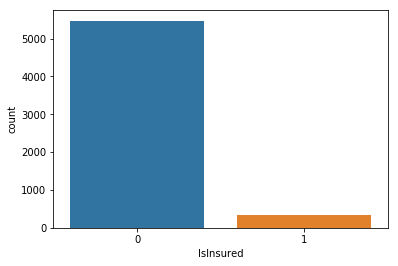

In [55]:
sns.countplot(trainData[evaluationCol])

In [57]:
count0 = len([data for data in trainData[evaluationCol] if data == 0])
count1 = len([data for data in trainData[evaluationCol] if data == 1])
totalCount = len(trainData[evaluationCol])
percentCount0 = round((count0/totalCount)*100,2)
percentCount1 = round((count1/totalCount)*100,2)


print('count - 0:{} times and 1:{} times'.format(count0, count1))
print('percentage - 0:{} % and 1:{} %'.format(percentCount0, percentCount1))

count - 0:5474 times and 1:348 times
percentage - 0:94.02 % and 1:5.98 %


## Train Data

In [50]:
print(trainData.info())
print(trainData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
Customer_Subtype                                    5822 non-null int64
Number_of_houses                                    5822 non-null int64
Avg_size_household                                  5822 non-null int64
Avg_age                                             5822 non-null int64
Customer_main_type                                  5822 non-null int64
Roman_catholic                                      5822 non-null int64
Protestant                                          5822 non-null int64
Other_religion                                      5822 non-null int64
No_religion                                         5822 non-null int64
Married                                             5822 non-null int64
Living_together                                     5822 non-null int64
Other_relation                                      5822 non-null int64
Singles                      

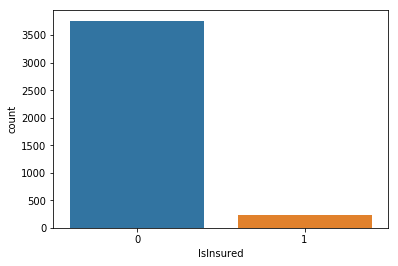

In [58]:
sns.countplot(evaluationData[evaluationCol])

In [59]:
count0 = len([data for data in evaluationData[evaluationCol] if data == 0])
count1 = len([data for data in evaluationData[evaluationCol] if data == 1])
totalCount = len(evaluationData[evaluationCol])
percentCount0 = round((count0/totalCount)*100,2)
percentCount1 = round((count1/totalCount)*100,2)


print('count - 0:{} times and 1:{} times'.format(count0, count1))
print('percentage - 0:{} % and 1:{} %'.format(percentCount0, percentCount1))

count - 0:3762 times and 1:238 times
percentage - 0:94.05 % and 1:5.95 %


## Test Data

In [5]:
print(testData.info())
print(testData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 85 columns):
0     4000 non-null int64
1     4000 non-null int64
2     4000 non-null int64
3     4000 non-null int64
4     4000 non-null int64
5     4000 non-null int64
6     4000 non-null int64
7     4000 non-null int64
8     4000 non-null int64
9     4000 non-null int64
10    4000 non-null int64
11    4000 non-null int64
12    4000 non-null int64
13    4000 non-null int64
14    4000 non-null int64
15    4000 non-null int64
16    4000 non-null int64
17    4000 non-null int64
18    4000 non-null int64
19    4000 non-null int64
20    4000 non-null int64
21    4000 non-null int64
22    4000 non-null int64
23    4000 non-null int64
24    4000 non-null int64
25    4000 non-null int64
26    4000 non-null int64
27    4000 non-null int64
28    4000 non-null int64
29    4000 non-null int64
30    4000 non-null int64
31    4000 non-null int64
32    4000 non-null int64
33    4000 non-null int64
34    400

## Total Entries

In [23]:
trainLen = len(trainData)
testLen = len(testData)
total = trainLen + testLen
percentTrain = (trainLen/total)*100
percentTest = (testLen/total)*100
print('Total entry (trian({0}) + test({1})) = {2}'.format(trainLen,testLen,total))
print('Percentage train-{0}% test-{1}%'.format(round(percentTrain,2), round(percentTest,2)))

Total entry (trian(5822) + test(4000)) = 9822
Percentage train-59.28% test-40.72%


## Missing Value Checking

### Train data

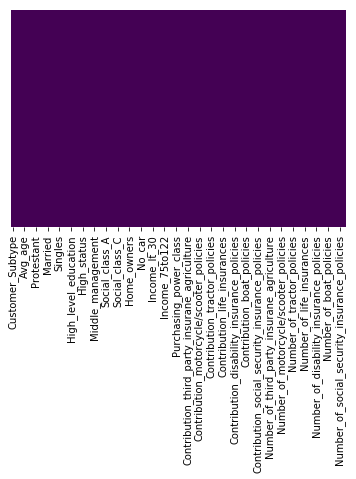

In [7]:
sns.heatmap(trainData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Test data

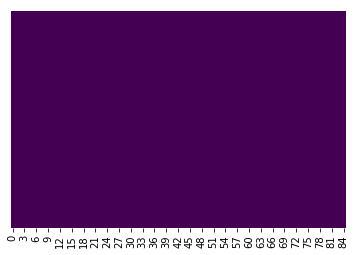

In [8]:
sns.heatmap(testData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Train

In [88]:
y = trainData[evaluationCol]
x = trainData.drop(columns=[evaluationCol],axis=1)
logmodel = LogisticRegression()
svmmodel = SVC()
perceptronmodel = Perceptron()
sgdmodel = SGDClassifier()

logmodel.fit(x,y)
svmmodel.fit(x,y)
perceptronmodel.fit(x,y)
sgdmodel.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

# Evaluation

In [102]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

def evalute(predictions, model, showLogs = False):
    result = logmodel.score(testData,evaluationData)
    print('accuracy of {} - {}'.format(model, result))
    if showLogs:
        print_confusion_matrix(confusion_matrix(evaluationData, predictions),['0','1'])
        print(classification_report(evaluationData ,predictions))

accuracy of Logistic regression - 0.94
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3762
          1       0.38      0.01      0.02       238

avg / total       0.91      0.94      0.91      4000

accuracy of SVM - 0.94
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3762
          1       0.00      0.00      0.00       238

avg / total       0.88      0.94      0.91      4000

accuracy of perceptron - 0.94
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      3762
          1       0.00      0.00      0.00       238

avg / total       0.88      0.94      0.91      4000

accuracy of SGD - 0.94


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.95      0.95      0.95      3762
          1       0.19      0.18      0.19       238

avg / total       0.90      0.91      0.91      4000



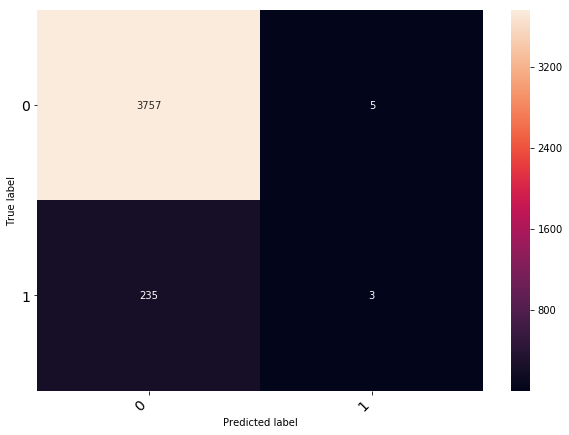

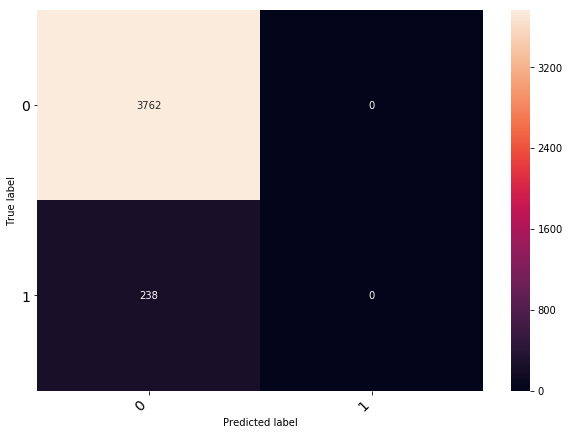

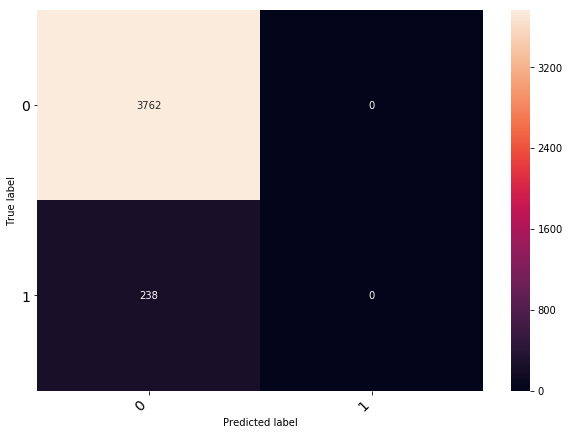

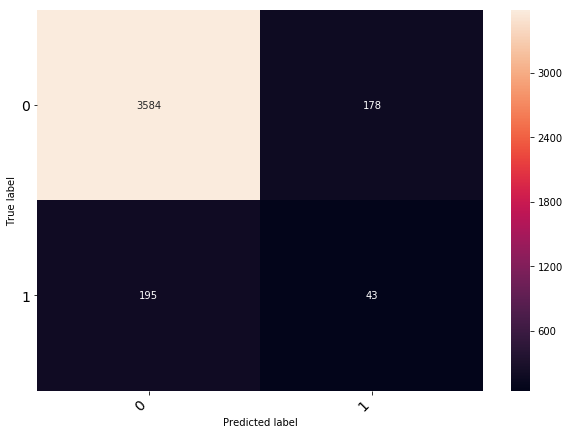

In [103]:
evalute(logmodel.predict(testData), model='Logistic regression',showLogs = True)
evalute(svmmodel.predict(testData), model='SVM',showLogs = True)
evalute(perceptronmodel.predict(testData), model='perceptron',showLogs = True)
evalute(sgdmodel.predict(testData), model='SGD',showLogs = True)

# comments
* The accuracy is not satisfactory
* The true negative and false negative rate is very high. So it is biased to negation.

# References
01. [data set](https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29)
02. [pretty confusion matrix](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)